# LeNet and AlexNet v1

We now understand the key differentiating parts of a CNN:
* convolutional layer
* max pooling layer

Today I will give you a pytorch implementation of a complete CNN (modeled on LeNet) that uses the MNIST dataset to train a model for OCR. You will:
1. Answer questions about this architecture
2. Modify this architecture to get AlexNet

Instead of using the textbook's implementation I will use a pure pytorch implementation from Paperspace (https://blog.paperspace.com/writing-lenet5-from-scratch-in-python/).

## Import packages

*Note, no d2l!*

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

## Load MNIST data

*Note single fixed train/test split!*

**Questions**:
1. In what circumstances is it ok to use a single fixed train/test split?
2. Why is there no dev split here?
3. What percent of the data is set aside for test?
4. Why are the pictures being resized? 

In [ ]:
batch_size = 64

train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

## Define the architecture

**Questions**:
1. How many convolutional layers are there?
2. How many max pooling layers are there?
3. How many dense layers are there?
4. In the first convolution layer:
   * What do the arguments to Conv2D mean?
   * What's a BatchNorm2d?
   * What's the activation function for this layer?
   * What's the shape (height, width, channels) coming out of this layer?
5. In the second convolution layer:
   * What do the arguments to Conv2D mean?
   * What's the shape (height, width, channels) coming out of this layer?
6. What's the width of each dense layer?
7. Where does the data get flattened?
8. What is the activation on each hidden dense layer?
9. Draw the arrangement of layers.

In [ ]:
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

## Train

**Questions**:
1. What loss function is used?
2. What optimizer is used?
3. What's the learning rate?

In [ ]:
# Define relevant variables for the ML task
num_classes = 10
learning_rate = 0.001
num_epochs = 10

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LeNet5(num_classes).to(device)

#Setting the loss function
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_loader)

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(images)
        loss = cost(outputs, labels)
        	
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        		
        if (i+1) % 400 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

## Test

**Questions:**
1. How do we choose among the classes?
2. What's the accuracy?
3. What's best reported accuracy on MNIST?

In [ ]:
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
	 

## Summary of LeNet

**Questions:**
1. Comparing this implementation to the LeNet-1 one in https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=0a263d0dae9482cd3498f3674aa66980298ca17c, what are the differences? (Feel free to refer to the textbook.)
2. The paper compares a CNN to other approaches. Which wins?
3. The paper talks about the "large size of the training set". What is the size of MNIST vs ImageNet? What is the number of classes in MNIST vs ImageNet?

## AlexNet

Modify the code above to implement AlexNet **for MNIST** (https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf; also, refer to the textbook). Ignore the multiple GPU aspect of the original AlexNet implementation. Bear in mind MNIST images and ImageNet images are not the same size.

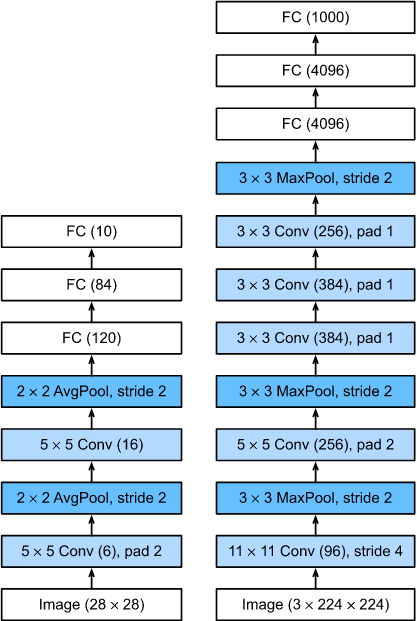

*from the textbook*

Note that our implementation doesn't use padding, while the original LeNet did. *Why?*

## Future work

We will come back to:
* Adam on Thursday (and in project 3)
* AlexNet and other complex networks next week